Total distance of all lines: 7.06 km


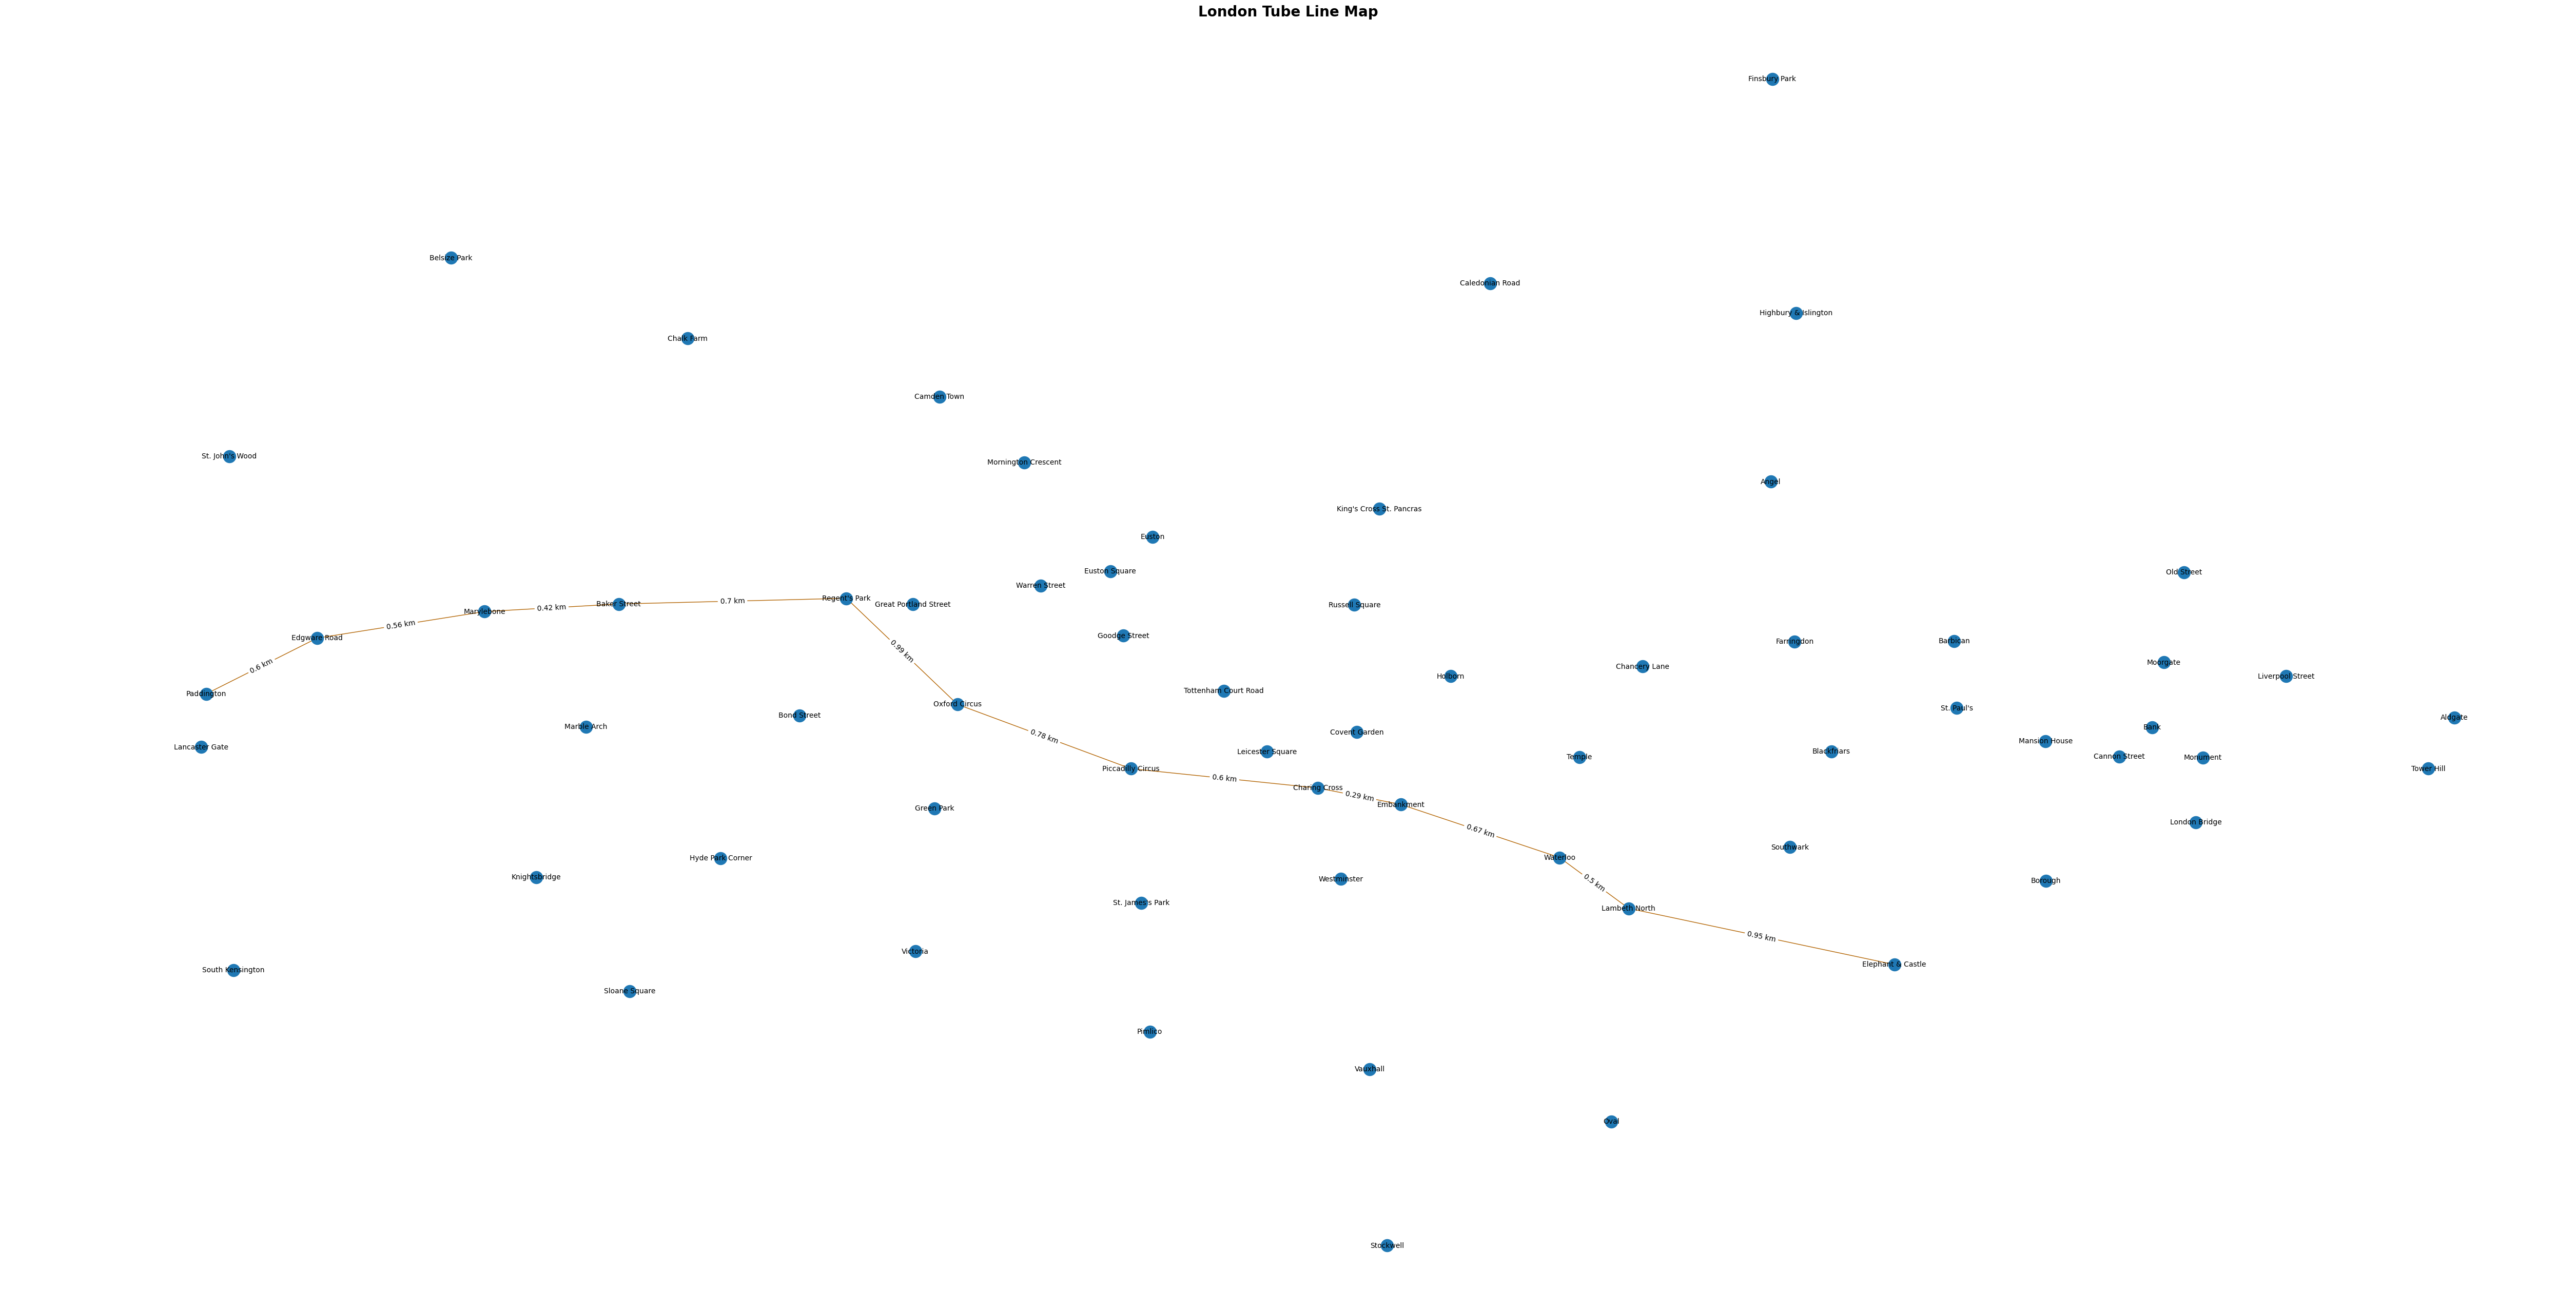

In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ------------------- Data Loading -------------------
# Load the CSV file
file_path = 'London stations.csv'  # Replace with the actual file path
stations_data = pd.read_csv(file_path)
stations_data.columns = stations_data.columns.str.strip()  # Remove extra spaces

# ------------------- Haversine Function -------------------
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# ------------------- Graph Data Preparation -------------------
# Define edges for each line
bakerloo_line_edges = [
    ("Elephant & Castle", "Lambeth North"),
    ("Lambeth North", "Waterloo"),
    ("Waterloo", "Embankment"),
    ("Embankment", "Charing Cross"),
    ("Charing Cross", "Piccadilly Circus"),
    ("Piccadilly Circus", "Oxford Circus"),
    ("Oxford Circus", "Regent's Park"),
    ("Regent's Park", "Baker Street"),
    ("Baker Street", "Marylebone"),
    ("Marylebone", "Edgware Road"),
    ("Edgware Road", "Paddington"),
]

# Additional lines (central, circle, etc.) similar to bakerloo_line_edges
# (Insert other line edges here as shown in your code)

# Define color mapping
color_mapping = {
    'bakerloo': '#B26300',
    # Add other lines and their colors
}

edges = []
edge_labels = {}

# Prepare graph edges with distances
for edge_list, line_color in [
    (bakerloo_line_edges, color_mapping['bakerloo']),
    # Add other line edges and their colors
]:
    for edge in edge_list:
        station1 = stations_data[stations_data['Station'] == edge[0]].iloc[0]
        station2 = stations_data[stations_data['Station'] == edge[1]].iloc[0]
        distance = haversine(station1['Latitude'], station1['Longitude'],
                             station2['Latitude'], station2['Longitude'])
        edges.append((edge[0], edge[1], round(distance, 2), line_color))
        edge_labels[(edge[0], edge[1])] = f"{round(distance, 2)} km"

# Build the graph
G = nx.Graph()
for _, row in stations_data.iterrows():
    G.add_node(row['Station'], pos=(row['Longitude'], row['Latitude']))

for edge in edges:
    G.add_edge(edge[0], edge[1], color=edge[3], weight=edge[2])

# ------------------- Calculate Total Distance -------------------
total_kilometers = sum(G[u][v]['weight'] for u, v in G.edges())
print(f"Total distance of all lines: {total_kilometers:.2f} km")

# ------------------- Graph Visualization -------------------
plt.figure(figsize=(50, 25))
positions = nx.get_node_attributes(G, 'pos')

# Draw edges with colors
edge_colors = [G[u][v]['color'] for u, v in G.edges()]
nx.draw(G, pos=positions, edge_color=edge_colors, with_labels=True, node_size=300, font_size=10)

# Add edge labels
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels=edge_labels, font_size=10)

plt.title("London Tube Line Map", fontsize=20, fontweight='bold')
plt.show()
